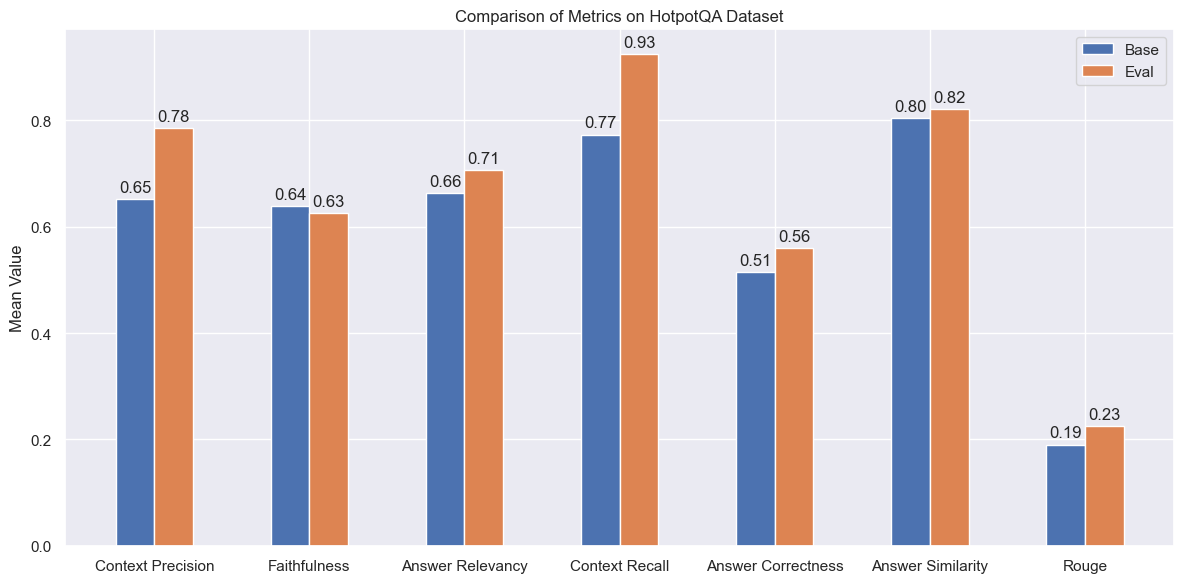

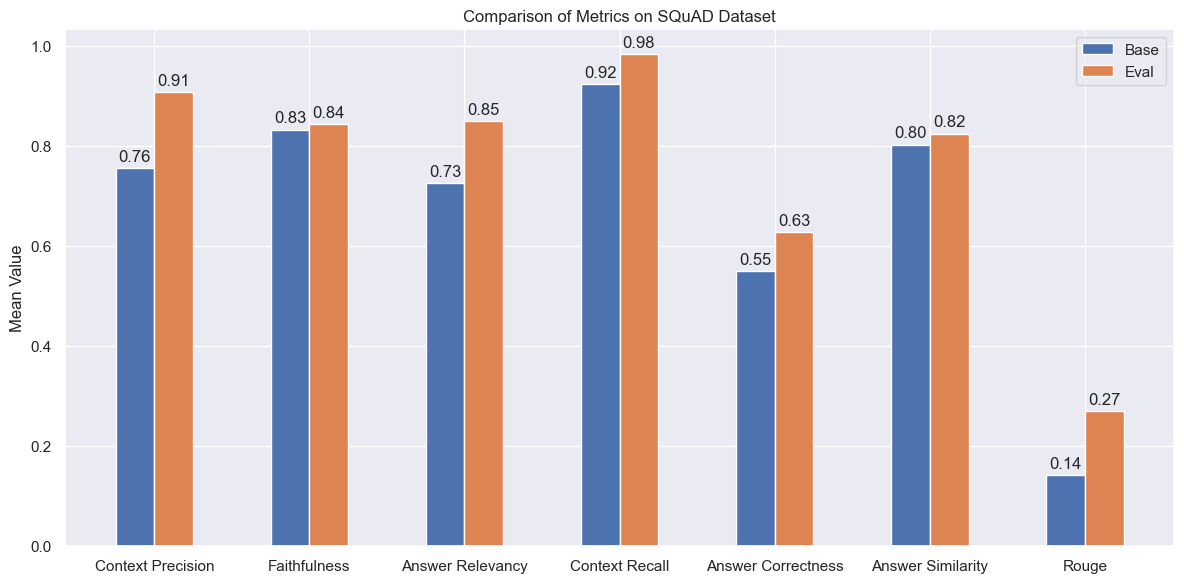

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

# File paths
base_hp_path = 'D:/Local-RAG-Assistant-Chatbot/eval/metrics/hotpot/base/metrics_base_hotpot.csv'
base_squad_path = 'D:/Local-RAG-Assistant-Chatbot/eval/metrics/squad/base/metrics_base_squad.csv'
hp_path = 'D:/Local-RAG-Assistant-Chatbot/eval/metrics/hotpot/eval/metrics_eval_hotpot.csv'
squad_path = 'D:/Local-RAG-Assistant-Chatbot/eval/metrics/squad/eval/metrics_eval_squad.csv'

# Function to load data and extract metrics for a specific dataset
def load_and_extract_metrics(file_path, dataset_name):
    df = pd.read_csv(file_path)
    metrics = ['context_precision','faithfulness','answer_relevancy','context_recall','answer_correctness','answer_similarity','rouge1']
    metrics_data = df[metrics].mean().values
    return metrics_data

# Load and extract metrics for HotpotQA dataset
base_hp_metrics = load_and_extract_metrics(base_hp_path, 'HotpotQA')
eval_hp_metrics = load_and_extract_metrics(hp_path, 'HotpotQA')

# Load and extract metrics for SQuAD dataset
base_squad_metrics = load_and_extract_metrics(base_squad_path, 'SQuAD')
eval_squad_metrics = load_and_extract_metrics(squad_path, 'SQuAD')

# Define the metrics and labels
metrics = ['Context Precision','Faithfulness','Answer Relevancy','Context Recall','Answer Correctness','Answer Similarity','Rouge']
labels = ['Base', 'Eval']

# Plotting function for comparing metrics for a dataset
def plot_metrics_comparison(metrics_base, metrics_eval, dataset_name):
    x = np.arange(len(metrics))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width/2, metrics_base, width, label='Base')
    rects2 = ax.bar(x + width/2, metrics_eval, width, label='Eval')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Mean Value')
    ax.set_title(f'Comparison of Metrics on {dataset_name} Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Add values on top of bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('%.2f' % height,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

# Plotting comparison for HotpotQA dataset
plot_metrics_comparison(base_hp_metrics, eval_hp_metrics, 'HotpotQA')

# Plotting comparison for SQuAD dataset
plot_metrics_comparison(base_squad_metrics, eval_squad_metrics, 'SQuAD')

# Show the plots
plt.show()
